# Import Library yang Digunakan

In [177]:
# import library yang digunakan

import pandas as pd 
import string
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from indoNLP.preprocessing import replace_slang, replace_word_elongation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB

# stopwords removal
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

stopwords_id = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Import Dataset

In [140]:
data_df =  pd.read_csv('./youtube_comments.csv')
data_df.head()

,author,published_time,likes,comment,isPublic
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,"Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia, seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi, dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik. Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi🙏",True
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliatan, meskipun lu perokok, lu itu di idolakan, bisa jadi contoh buruk",True
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True


## Menilai Data

In [141]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12142 entries, 0 to 12141
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          12139 non-null  object
 1   published_time  12142 non-null  object
 2   likes           12142 non-null  int64 
 3   comment         12142 non-null  object
 4   isPublic        12142 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 391.4+ KB


In [142]:
data_df.describe(include='all')

,author,published_time,likes,comment,isPublic
count,12139,12142,12142.000000,12142,12142
unique,11470,11997,NaN,12096,1
top,@LLLLlll__0000,2024-10-11T03:06:20Z,NaN,😢,True
freq,131,3,NaN,9,12142
mean,NaN,NaN,5.991929,NaN,NaN
std,NaN,NaN,187.515345,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [143]:
# melihat missing value
data_df.isnull().sum()

author            3
published_time    0
likes             0
comment           0
isPublic          0
dtype: int64

In [144]:
# melihat data duplikat
data_df[data_df.duplicated(subset='comment')]

,author,published_time,likes,comment,isPublic
501,@IbnurizkiPeratama,2024-12-13T00:28:36Z,0,Pasti yang nonton orang pintar,True
723,@SandiSotoy,2024-11-19T23:12:15Z,0,😢,True
905,@yohanaana3542,2024-11-10T10:39:48Z,0,BICARA PENDIDIKAN KO SAMBIL MEROKOK GOBLOK KAMU NGGA PUNYA OTAK NGGA PUNYA ADAB....NGGA BERPENDIDIKAN,True
907,@yohanaana3542,2024-11-10T10:32:09Z,0,BICARA PENDIDIKAN KO SAMBIL MEROKOK GOBLOK KAMU NGGA PUNYA OTAK NGGA PUNYA ADAB....NGGA BERPENDIDIKAN,True
981,@John_667,2024-11-08T13:25:17Z,1,"yg bego nya itu, dlu waktu sd 1 kelas yg pintar gw doang, nyontek ma gw mulu, kontolnya gw mau lagi ya gmna lgi klo gk, gk di temenin 🗿🗿🗿",True
1507,@dedekdy,2024-10-31T22:20:15Z,0,😢,True
1891,@arifplow5205,2024-10-28T13:18:01Z,0,Miris ya 😢,True
1903,@xamppphpblog9769,2024-10-28T11:30:49Z,0,Menurut aku.. indo zona pemalas.. Jadi ? Intinya guru galak itu sangat dibutuhkan.... asal jangan sampai ada patah tulang atau bengkak menaun aja.. sedikit jewer mah gpp.. harus nya orang tua senang anaknya dididik..,True
2409,@rahmadaf_,2024-10-25T11:55:02Z,0,😢,True
2635,@triasbahdin3941,2024-10-24T04:22:09Z,0,kita bakalan kehilangan banyak analis kedepan kan bg,True


In [145]:
# menghapus comment duplikat
data_df = data_df.drop_duplicates(subset='comment')

In [146]:
# melihat jumlah data setelah duplikasi di hapus
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12096 entries, 0 to 12141
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          12093 non-null  object
 1   published_time  12096 non-null  object
 2   likes           12096 non-null  int64 
 3   comment         12096 non-null  object
 4   isPublic        12096 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 484.3+ KB


- tidak ditemukan missing value pada hasil scraping comment
- terdapat beberapa data duplikat pada kolom 'comment' 

## Data Cleaning

In [147]:
# copy data
cleaned_df = data_df.copy()
cleaned_df.head()

,author,published_time,likes,comment,isPublic
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,"Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia, seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi, dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik. Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi🙏",True
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliatan, meskipun lu perokok, lu itu di idolakan, bisa jadi contoh buruk",True
4,@faridfarid-kv2il,2025-04-09T01:56:26Z,0,Gen produk nadiem😅😅😅,True


### Text Pre-processing

In [148]:
# fungsi untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

# case folding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [149]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
cleaned_df['text_clean'] = cleaned_df['comment'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
cleaned_df['text_casefoldingText'] = cleaned_df['text_clean'].apply(casefoldingText)

# menangani slang dan bacaan panjang
cleaned_df['text_slangwords'] = cleaned_df['text_casefoldingText'].apply(replace_slang)
cleaned_df['text_casefoldingText'] = cleaned_df['text_casefoldingText'].apply(replace_word_elongation)

# tokenisasi teks
cleaned_df['text_tokenizingText'] = cleaned_df['text_slangwords'].apply(tokenizingText)

# menghapus stopwords
cleaned_df['text_stopword'] = cleaned_df['text_tokenizingText'].apply(filteringText)

# menggabungkan token menjadi kalimat
cleaned_df['text_akhir'] = cleaned_df['text_stopword'].apply(toSentence)

In [150]:
cleaned_df.head()

,author,published_time,likes,comment,isPublic,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True,hallo warga sipil sekalian selamat menonton,hallo warga sipil sekalian selamat menonton,halo warga sipil sekalian selamat menonton,"[halo, warga, sipil, sekalian, selamat, menonton]","[halo, warga, sipil, selamat, menonton]",halo warga sipil selamat menonton
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True,prestasi menteri pendidikan LGBT ala barat,prestasi menteri pendidikan lgbt ala barat,prestasi menteri pendidikan lgbt ala barat,"[prestasi, menteri, pendidikan, lgbt, ala, barat]","[prestasi, menteri, pendidikan, lgbt, ala, barat]",prestasi menteri pendidikan lgbt ala barat
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,"Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia, seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi, dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik. Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi🙏",True,Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi,semoga mentri pendidikan periode ini bisa mengubah sistem pendidikan di indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan sistem un agar siswa di indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik dengan di adakannya zonasi beberapa sekolah negeri di indonesia tidak ada yang menjadi sekolah favorit lagi,semoga mentri pendidikan periode ini bisa mengubah sistem pendidikan di indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan sistem un agar siswa di indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik dengan di adakannya zonasi beberapa sekolah negeri di indonesia tidak ada yang menjadi sekolah favorit lagi,"[semoga, mentri, pendidikan, periode, ini, bisa, mengubah, sistem, pendidikan, di, indonesia, seperi, mengurangi, kuota, untuk, masuk, suatu, sekolah, dengan, sistem, zonasi, dan, mengembalikan, sistem, un, agar, siswa, di, indonesia, kembali, memiliki, daya, bersain, untuk, mengejar, prestasi, dan, sekolah, terbaik, dengan, di, adakannya, zonasi, beberapa, sekolah, negeri, di, indonesia, tidak, ada, yang, menjadi, sekolah, favorit, lagi]","[semoga, mentri, pendidikan, periode, mengubah, sistem, pendidikan, indonesia, seperi, mengurangi, kuota, masuk, sekolah, sistem, zonasi, mengembalikan, sistem, un, siswa, indonesia, memiliki, daya, bersain, mengejar, prestasi, sekolah, terbaik, adakannya, zonasi, sekolah, negeri, indonesia, sekolah, favorit]",semoga mentri pendidikan periode mengubah sistem pendidikan indonesia seperi mengurangi kuota masuk sekolah sistem zonasi mengembalikan sistem un siswa indonesia memiliki daya bersain mengejar prestasi sekolah terbaik adakannya zonasi sekolah negeri indonesia sekolah favorit
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliatan, meskipun lu perokok, lu itu di idolakan, bisa jadi contoh buruk",True,Jgn ngerokok bos minimal di video ngga keliatan meskipun lu perokok lu itu di idolakan bisa jadi contoh buruk,jgn ngerokok bos minimal di video ngga keliatan meskipun lu perokok lu itu di idolakan bisa jadi contoh buruk,jangan ngerokok bos minimal di video enggak kelihatan meskipun lu perokok lu itu di idolakan bisa jadi contoh buruk,"[janga

## Labeling

In [151]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Terapkan pada DataFrame
cleaned_df['sentiment'] = cleaned_df['text_akhir'].apply(get_sentiment)
cleaned_df['sentiment_label'] = cleaned_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
cleaned_df.head(20)

,author,published_time,likes,comment,isPublic,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment,sentiment_label
0,@ferryirwandi,2024-10-10T09:02:59Z,4729,"hallo warga sipil sekalian, selamat menonton",True,hallo warga sipil sekalian selamat menonton,hallo warga sipil sekalian selamat menonton,halo warga sipil sekalian selamat menonton,"[halo, warga, sipil, sekalian, selamat, menonton]","[halo, warga, sipil, selamat, menonton]",halo warga sipil selamat menonton,0.0,neutral
1,@udinaja5394,2025-04-11T22:47:18Z,0,prestasi menteri pendidikan LGBT ala barat,True,prestasi menteri pendidikan LGBT ala barat,prestasi menteri pendidikan lgbt ala barat,prestasi menteri pendidikan lgbt ala barat,"[prestasi, menteri, pendidikan, lgbt, ala, barat]","[prestasi, menteri, pendidikan, lgbt, ala, barat]",prestasi menteri pendidikan lgbt ala barat,0.0,neutral
2,@anisafiqriyah8612,2025-04-10T06:09:05Z,0,"Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia, seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi, dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik. Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi🙏",True,Semoga Mentri Pendidikan periode ini bisa mengubah sistem pendidikan di Indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan Sistem UN agar siswa di Indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik Dengan di adakannya zonasi beberapa sekolah negeri di Indonesia tidak ada yang menjadi sekolah favorit lagi,semoga mentri pendidikan periode ini bisa mengubah sistem pendidikan di indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan sistem un agar siswa di indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik dengan di adakannya zonasi beberapa sekolah negeri di indonesia tidak ada yang menjadi sekolah favorit lagi,semoga mentri pendidikan periode ini bisa mengubah sistem pendidikan di indonesia seperi mengurangi kuota untuk masuk suatu sekolah dengan sistem zonasi dan mengembalikan sistem un agar siswa di indonesia kembali memiliki daya bersain untuk mengejar prestasi dan sekolah terbaik dengan di adakannya zonasi beberapa sekolah negeri di indonesia tidak ada yang menjadi sekolah favorit lagi,"[semoga, mentri, pendidikan, periode, ini, bisa, mengubah, sistem, pendidikan, di, indonesia, seperi, mengurangi, kuota, untuk, masuk, suatu, sekolah, dengan, sistem, zonasi, dan, mengembalikan, sistem, un, agar, siswa, di, indonesia, kembali, memiliki, daya, bersain, untuk, mengejar, prestasi, dan, sekolah, terbaik, dengan, di, adakannya, zonasi, beberapa, sekolah, negeri, di, indonesia, tidak, ada, yang, menjadi, sekolah, favorit, lagi]","[semoga, mentri, pendidikan, periode, mengubah, sistem, pendidikan, indonesia, seperi, mengurangi, kuota, masuk, sekolah, sistem, zonasi, mengembalikan, sistem, un, siswa, indonesia, memiliki, daya, bersain, mengejar, prestasi, sekolah, terbaik, adakannya, zonasi, sekolah, negeri, indonesia, sekolah, favorit]",semoga mentri pendidikan periode mengubah sistem pendidikan indonesia seperi mengurangi kuota masuk sekolah sistem zonasi mengembalikan sistem un siswa indonesia memiliki daya bersain mengejar prestasi sekolah terbaik adakannya zonasi sekolah negeri indonesia sekolah favorit,0.0,neutral
3,@MuhammadAmin-yt8sd,2025-04-09T15:59:13Z,0,"Jgn ngerokok bos, minimal di video ngga keliatan, meskipun lu perokok, lu itu di idolakan, bisa jadi contoh buruk",True,Jgn ngerokok bos minimal di video ngga keliatan meskipun lu perokok lu itu di idolakan bisa jadi contoh buruk,jgn ngerokok bos minimal di video ngga keliatan meskipun lu perokok lu itu di idolakan bisa jadi contoh buruk,jangan ngerokok bos minimal di video enggak kelihatan meskipu

In [152]:
cleaned_df.to_csv('labeled_comment.csv', index=False)

## Eksplorasi Label

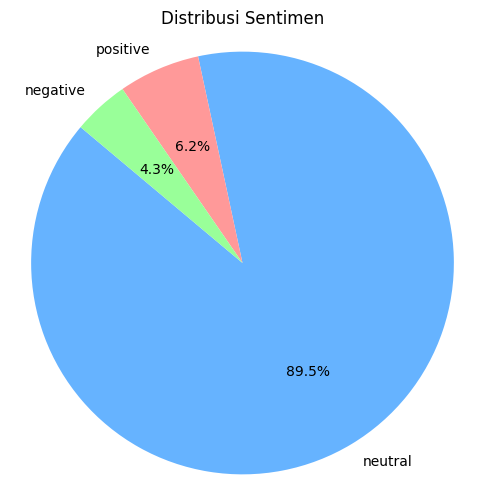

In [153]:

# Hitung jumlah masing-masing label
sentiment_counts = cleaned_df['sentiment_label'].value_counts()

# Buat pie chart
colors = ['#66b3ff', '#ff9999', '#99ff99'] 
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Sentimen')
plt.axis('equal')  
plt.show()


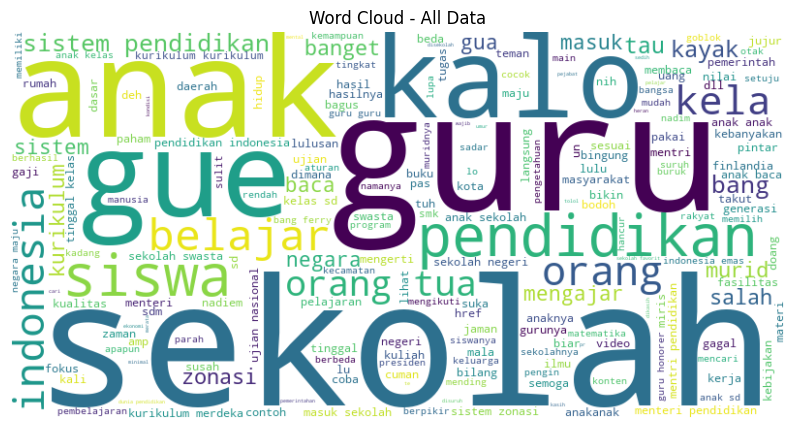

In [154]:
# membuat word cloud untuk semua data
all_text = ' '.join(cleaned_df['text_akhir'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title("Word Cloud - All Data")
plt.axis('off')
plt.show()

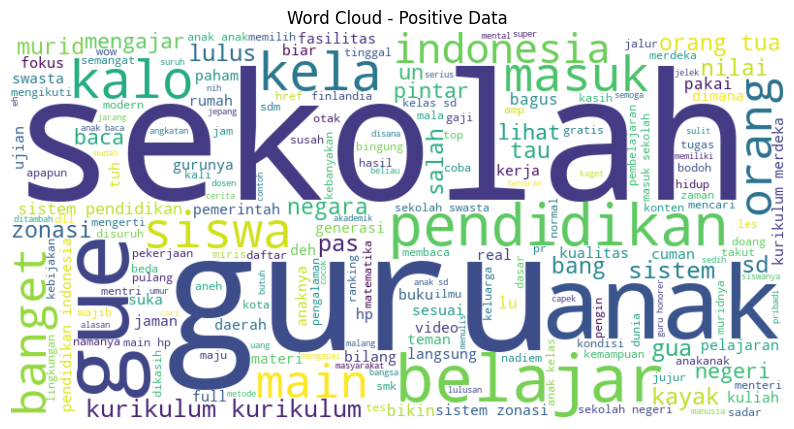

In [155]:
# membuat word cloud untuk data positif
positive_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'positive']['text_akhir'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Word Cloud - Positive Data")
plt.axis('off')
plt.show()

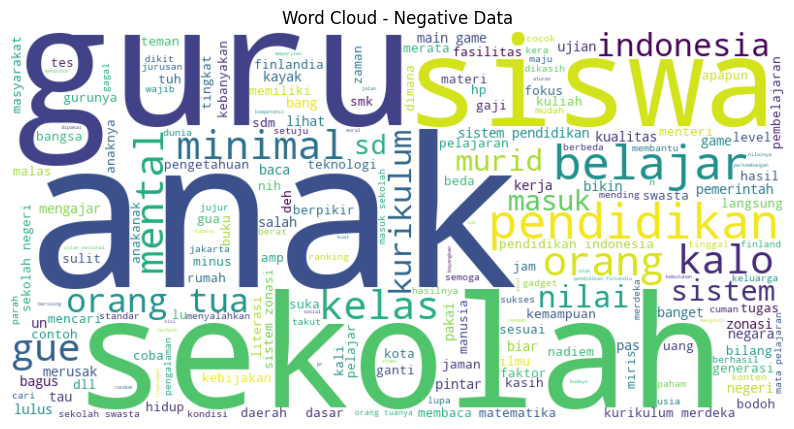

In [156]:
# Word cloud untuk data negatif
negative_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'negative']['text_akhir'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud - Negative Data")
plt.axis('off')
plt.show()

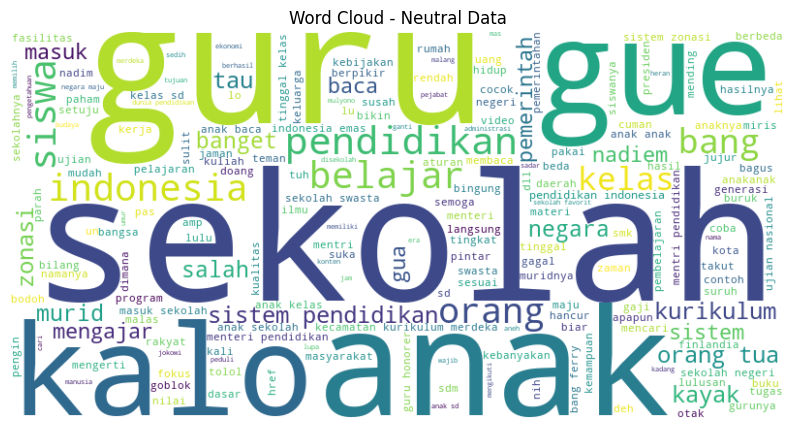

In [157]:
# Word cloud untuk data netral
neutral_text = ' '.join(cleaned_df[cleaned_df['sentiment_label'] == 'neutral']['text_akhir'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Word Cloud - Neutral Data")
plt.axis('off')
plt.show()

c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


          word  count
16     sekolah   4507
14  pendidikan   4227
0         anak   4192
6         guru   3457
17      sistem   2406
13       orang   2343
7    indonesia   2222
5          gue   2096
9        kelas   2005
4      belajar   1830
10   kurikulum   1629
18       siswa   1569
8         kalo   1532
19      zonasi   1351
2         bang   1345
11       masuk   1319
1         baca   1301
12      negeri   1169
15          sd   1122
3       banget   1082


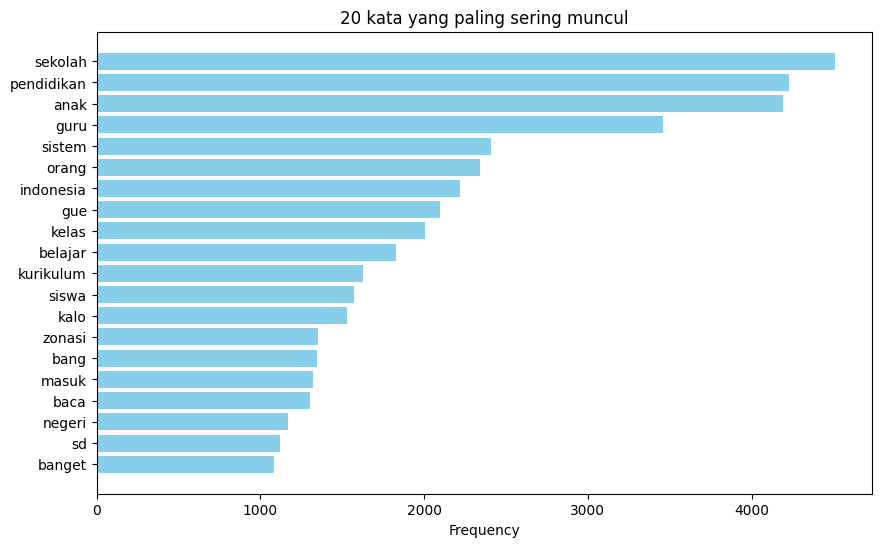

In [158]:
vectorizer = CountVectorizer(stop_words=stopwords_id, max_features=20)
X_tfidf = vectorizer.fit_transform(cleaned_df['text_akhir'])

# Mengambil fitur kata dan jumlah kemunculannya
words = vectorizer.get_feature_names_out()
word_counts = X_tfidf.toarray().sum(axis=0)

# Membuat DataFrame 
word_freq_df = pd.DataFrame({
    'word': words,
    'count': word_counts
})

# Mengurutkan berdasarkan frekuensi kata
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Menampilkan 20 kata dengan frekuensi tertinggi
print(word_freq_df.head(20))

plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['word'], word_freq_df['count'], color='skyblue')  # Menampilkan 20 kata
plt.xlabel('Frequency')
plt.title('20 kata yang paling sering muncul')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kata dengan frekuensi tertinggi ada di atas
plt.show()


## Modeling 

### Menyiapkan Data

In [159]:
# inisialisasi variabe independen dan target
X = cleaned_df['text_akhir']
y = cleaned_df['sentiment_label']

# Pembagian data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# pembagian data 70/30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

### Ekstraksi Fitur

In [160]:
# ekstraksi fitur dengan TF-IDF
vectorizer_tfid = TfidfVectorizer(stop_words=stopwords_id, max_features=5000)

# ekstraksi data 80/20
X_train_tfidf = vectorizer_tfid.fit_transform(X_train)
X_test_tfidf = vectorizer_tfid.transform(X_test)

# ekstraksi data 70/30
X_train_tfidf_70 = vectorizer_tfid.fit_transform(X_train_70)
X_test_tfidf_30 = vectorizer_tfid.transform(X_test_30)

c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [161]:
# ekstraksi fitur dengan Word2Vec

# inisialisasi Word2Vec model
sentences = [text.split() for text in X_train]
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def vectorize_sentence(sentence):
    words = sentence.split()
    word_vectors = [model_w2v.wv[word] for word in words if word in model_w2v.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model_w2v.vector_size)

X_train_w2v = np.array([vectorize_sentence(text) for text in X_train])
X_test_w2v = np.array([vectorize_sentence(text) for text in X_test])

### Membuat Model


In [203]:
# model Naive Bayes
model_nb = MultinomialNB()

# Melatih model dengan data latih (gunakan X_train_tfidf)
model_nb.fit(X_train_tfidf, y_train)

# Prediksi hasil pada data uji (gunakan X_test_tfidf)
y_pred_nb = model_nb.predict(X_test_tfidf)

# Menampilkan akurasi
print(f"Akurasi Naive Bayes (80/20): {accuracy_score(y_test, y_pred_nb)}")

# Menampilkan precision, recall, f1-score, dan support
print(classification_report(y_test, y_pred_nb))


Akurasi Naive Bayes (80/20): 0.8979338842975206
              precision    recall  f1-score   support

    negative       1.00      0.02      0.04       105
     neutral       0.90      1.00      0.95      2166
    positive       1.00      0.03      0.06       149

    accuracy                           0.90      2420
   macro avg       0.97      0.35      0.35      2420
weighted avg       0.91      0.90      0.85      2420



In [ ]:
# model 2
# random forest dengan ekstraksi fitur Word2Vec
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train_w2v, y_train)

y_pred_rf = model_rf.predict(X_test_w2v)

# Menampilkan akurasi
print(f"Akurasi RF dengan Word2Vec (80/20): {accuracy_score(y_test, y_pred_rf)}")

# Menampilkan precision, recall, f1-score, dan support
print(classification_report(y_test, y_pred_rf))


Akurasi RF dengan Word2Vec (80/20): 0.8954545454545455
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       105
     neutral       0.90      1.00      0.94      2166
    positive       1.00      0.01      0.01       149

    accuracy                           0.90      2420
   macro avg       0.63      0.34      0.32      2420
weighted avg       0.86      0.90      0.85      2420



c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DBS Coding Camp\tugas\nlp-proyek-pertama\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [168]:
# model 3
# random forest dengan ekstraksi fitur TFID

rf_model_70_30 = RandomForestClassifier(n_estimators=100)
rf_model_70_30.fit(X_train_tfidf_70, y_train_70)

y_pred_rf_70_30 = rf_model_70_30.predict(X_test_tfidf_30)

# Menampilkan akurasi
print(f"Akurasi RF dengan TF-IDF (70/30): {accuracy_score(y_test_30, y_pred_rf_70_30)}")

# Menampilkan precision, recall, f1-score, dan support
print(classification_report(y_test_30, y_pred_rf_70_30))

Akurasi RF dengan TF-IDF (70/30): 0.9685863874345549
              precision    recall  f1-score   support

    negative       0.91      0.69      0.79       138
     neutral       0.97      1.00      0.98      3260
    positive       0.99      0.69      0.81       231

    accuracy                           0.97      3629
   macro avg       0.96      0.79      0.86      3629
weighted avg       0.97      0.97      0.97      3629



- akurasi tertinggi diperoleh oleh data dengan ekstraksi fitur dengan metode TF-ID dengan model Random Forest dengan akurasi 0.96